## Introduction
Using a dataset of Netflix's movies and TV shows, this notebook will employ data exploration techniques to reveal interesting patterns and insights. We will examine the characteristics of Netflix's content library and consider how these might inform future content trends.

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


file_path = '/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv'
df = pd.read_csv(file_path)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Data Cleaning and Preprocessing

In [2]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [3]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)


df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

## Exploratory Data Analysis

### Distribution of Content Types

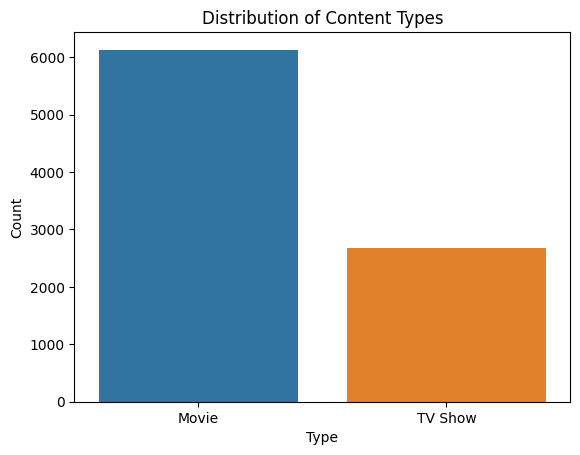

In [4]:
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### Content Over the Years

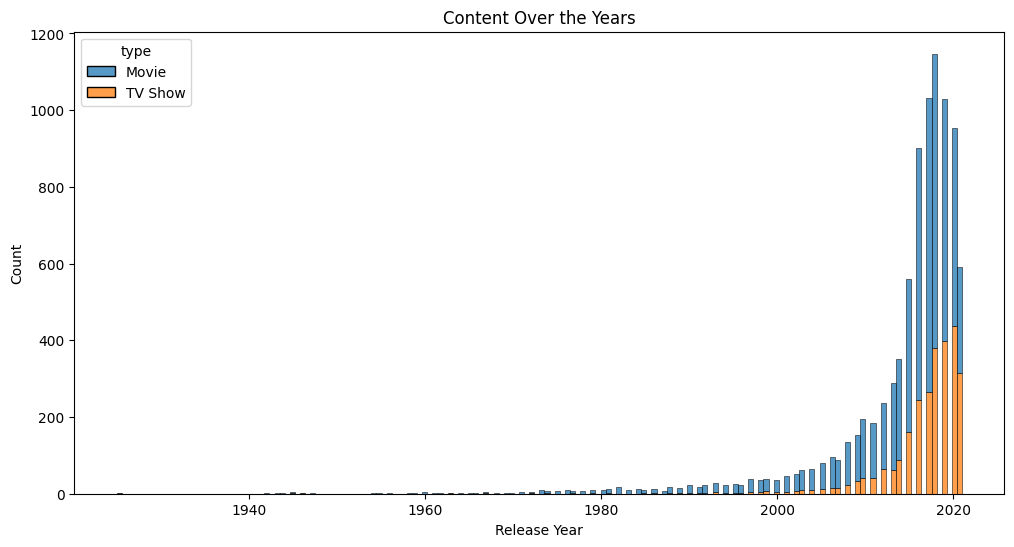

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='release_year', hue='type', multiple='stack')
plt.title('Content Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

### Top Directors and Actors

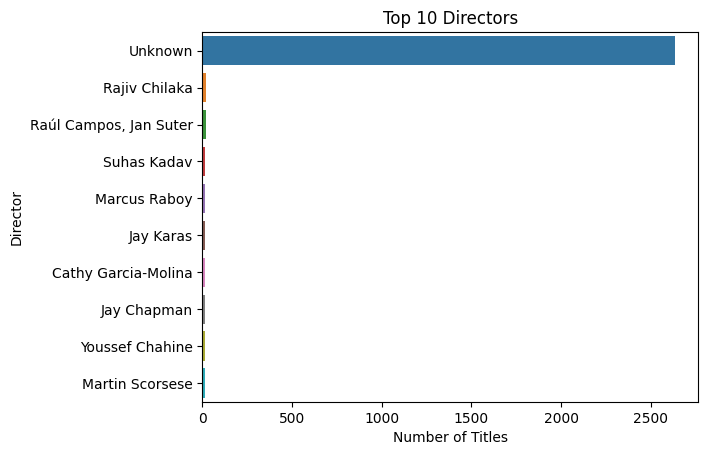

In [6]:
top_directors = df['director'].value_counts().head(10)
sns.barplot(y=top_directors.index, x=top_directors.values)
plt.title('Top 10 Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

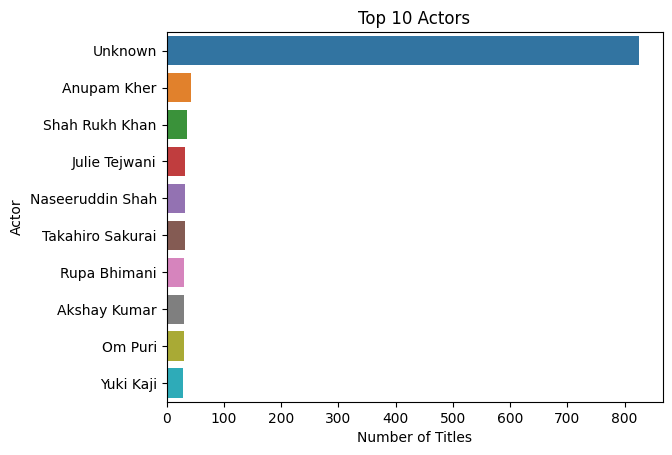

In [7]:
top_actors = df['cast'].str.split(', ', expand=True).stack().value_counts().head(10)
sns.barplot(y=top_actors.index, x=top_actors.values)
plt.title('Top 10 Actors')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()

### Content by Country

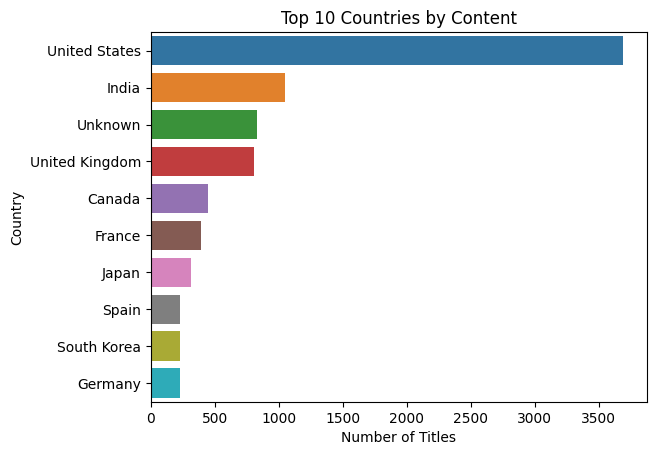

In [8]:
top_countries = df['country'].str.split(', ', expand=True).stack().value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Countries by Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

### Correlation Analysis

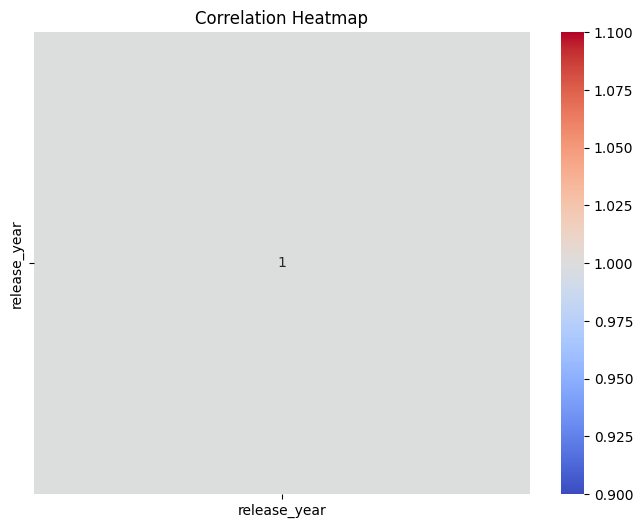

In [9]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Conclusion and Next Steps

My journey through the Netflix dataset has unveiled fascinating patterns in the platform's content strategy. From shifts in content types over the years to the influence of key directors and actors, I've gained a deeper understanding of Netflix's library.

But this is just the beginning! Future explorations could harness the power of machine learning to predict the next big hits on Netflix. I could also investigate how genres drive viewership and what makes certain content resonate with audiences, as reflected in ratings and popularity.